# **Backpack Prediction Challenge**

### Playground Series - Season 5, Episode 2

**Goal**: Predict the price of backpacks given various attributes

**Evaluation**: RMSE

**Start Date**: February 1, 2025

**Final Submission Deadline**: February 28, 2025

## Importing Libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

## Loading datasets

In [2]:
train = pd.read_csv('/kaggle/input/playground-series-s5e2/train.csv')
train_extra = pd.read_csv('/kaggle/input/playground-series-s5e2/training_extra.csv')
test = pd.read_csv('/kaggle/input/playground-series-s5e2/test.csv')
submission = pd.read_csv('/kaggle/input/playground-series-s5e2/sample_submission.csv')

## Dataset Summary

In [3]:
train.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


In [4]:
train_extra.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,500000,Under Armour,Canvas,Small,10.0,Yes,Yes,Tote,Blue,23.882052,114.11068
1,500001,Puma,Polyester,Small,4.0,No,Yes,Backpack,Green,11.869095,129.74972
2,500002,Jansport,Polyester,Small,8.0,Yes,Yes,Tote,Red,8.092302,21.37370
3,500003,Nike,Nylon,Large,7.0,No,No,Messenger,Pink,7.719581,48.09209
4,500004,Nike,Leather,Large,9.0,No,Yes,Tote,Green,22.741826,77.32461


In [5]:
test.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
0,300000,Puma,Leather,Small,2.0,No,No,Tote,Green,20.671147
1,300001,Nike,Canvas,Medium,7.0,No,Yes,Backpack,Green,13.564105
2,300002,Adidas,Canvas,Large,9.0,No,Yes,Messenger,Blue,11.809799
3,300003,Adidas,Nylon,Large,1.0,Yes,No,Messenger,Green,18.477036
4,300004,NaN,Nylon,Large,2.0,Yes,Yes,Tote,Black,9.907953


In [6]:
submission.head()

,id,Price
0,300000,81.411
1,300001,81.411
2,300002,81.411
3,300003,81.411
4,300004,81.411


In [7]:
train.describe()

,id,Compartments,Weight Capacity (kg),Price
count,300000.000000,300000.000000,299862.000000,300000.000000
mean,149999.500000,5.443590,18.029994,81.411107
std,86602.684716,2.890766,6.966914,39.039340
min,0.000000,1.000000,5.000000,15.000000
25%,74999.750000,3.000000,12.097867,47.384620
50%,149999.500000,5.000000,18.068614,80.956120
75%,224999.250000,8.000000,24.002375,115.018160
max,299999.000000,10.000000,30.000000,150.000000


In [8]:
train_extra.describe()

,id,Compartments,Weight Capacity (kg),Price
count,3.694318e+06,3.694318e+06,3.692648e+06,3.694318e+06
mean,2.347158e+06,5.434022e+00,1.800883e+01,8.135820e+01
std,1.066458e+06,2.893227e+00,6.974541e+00,3.893050e+01
min,5.000000e+05,1.000000e+00,5.000000e+00,1.500000e+01
25%,1.423579e+06,3.000000e+00,1.206854e+01,4.747778e+01
50%,2.347158e+06,5.000000e+00,1.805243e+01,8.098592e+01
75%,3.270738e+06,8.000000e+00,2.398580e+01,1.148434e+02
max,4.194317e+06,1.000000e+01,3.000000e+01,1.500000e+02


In [9]:
test.describe()

,id,Compartments,Weight Capacity (kg)
count,200000.000000,200000.000000,199923.000000
mean,399999.500000,5.442855,17.993033
std,57735.171256,2.888740,6.972079
min,300000.000000,1.000000,5.000000
25%,349999.750000,3.000000,12.068875
50%,399999.500000,5.000000,18.054750
75%,449999.250000,8.000000,23.965700
max,499999.000000,10.000000,30.000000


In [10]:
train.shape

(300000, 11)

In [11]:
train_extra.shape

(3694318, 11)

In [12]:
test.shape

(200000, 10)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    300000 non-null  int64  
 1   Brand                 290295 non-null  object 
 2   Material              291653 non-null  object 
 3   Size                  293405 non-null  object 
 4   Compartments          300000 non-null  float64
 5   Laptop Compartment    292556 non-null  object 
 6   Waterproof            292950 non-null  object 
 7   Style                 292030 non-null  object 
 8   Color                 290050 non-null  object 
 9   Weight Capacity (kg)  299862 non-null  float64
 10  Price                 300000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 25.2+ MB


In [14]:
train_extra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694318 entries, 0 to 3694317
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Brand                 object 
 2   Material              object 
 3   Size                  object 
 4   Compartments          float64
 5   Laptop Compartment    object 
 6   Waterproof            object 
 7   Style                 object 
 8   Color                 object 
 9   Weight Capacity (kg)  float64
 10  Price                 float64
dtypes: float64(3), int64(1), object(7)
memory usage: 310.0+ MB


In [15]:
train.replace([np.inf, -np.inf], np.nan, inplace=True)
train_extra.replace([np.inf, -np.inf], np.nan, inplace=True)

In [16]:
missing_train = train.isna().sum().sort_values(ascending=False)
missing_train

Color                   9950
Brand                   9705
Material                8347
Style                   7970
Laptop Compartment      7444
Waterproof              7050
Size                    6595
Weight Capacity (kg)     138
id                         0
Compartments               0
Price                      0
dtype: int64

In [17]:
missing_train_extra = train_extra.isna().sum().sort_values(ascending=False)
missing_train_extra

Color                   123667
Brand                   117053
Material                102615
Style                    96210
Laptop Compartment       91089
Waterproof               87274
Size                     81190
Weight Capacity (kg)      1670
id                           0
Compartments                 0
Price                        0
dtype: int64

In [18]:
# % of nan
missing_percent_train = missing_train/train.shape[0]*100
missing_percent_train

Color                   3.316667
Brand                   3.235000
Material                2.782333
Style                   2.656667
Laptop Compartment      2.481333
Waterproof              2.350000
Size                    2.198333
Weight Capacity (kg)    0.046000
id                      0.000000
Compartments            0.000000
Price                   0.000000
dtype: float64

In [19]:
# % of nan
missing_percent_train_extra = missing_train_extra/train_extra.shape[0]*100
missing_percent_train_extra

Color                   3.347492
Brand                   3.168460
Material                2.777644
Style                   2.604270
Laptop Compartment      2.465651
Waterproof              2.362385
Size                    2.197699
Weight Capacity (kg)    0.045205
id                      0.000000
Compartments            0.000000
Price                   0.000000
dtype: float64

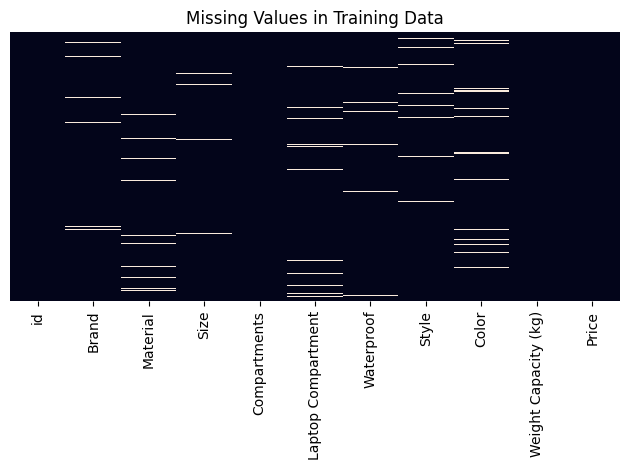

In [20]:
sns.heatmap(train.isna(), yticklabels=False, cbar=False)
plt.title('Missing Values in Training Data')
plt.tight_layout()
plt.show()

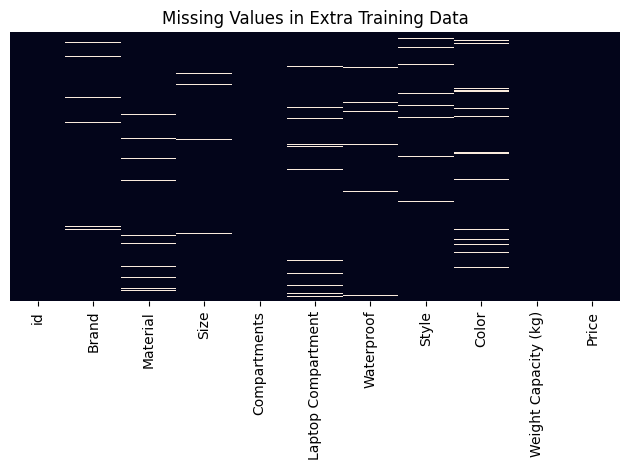

In [21]:
sns.heatmap(train.isna(), yticklabels=False, cbar=False)
plt.title('Missing Values in Extra Training Data')
plt.tight_layout()
plt.show()

In [22]:
target = 'Price'

In [23]:
ds = train.isin([np.inf, -np.inf]).sum()
print(ds) 

id                      0
Brand                   0
Material                0
Size                    0
Compartments            0
Laptop Compartment      0
Waterproof              0
Style                   0
Color                   0
Weight Capacity (kg)    0
Price                   0
dtype: int64


Skewness: 0.036882755131099065


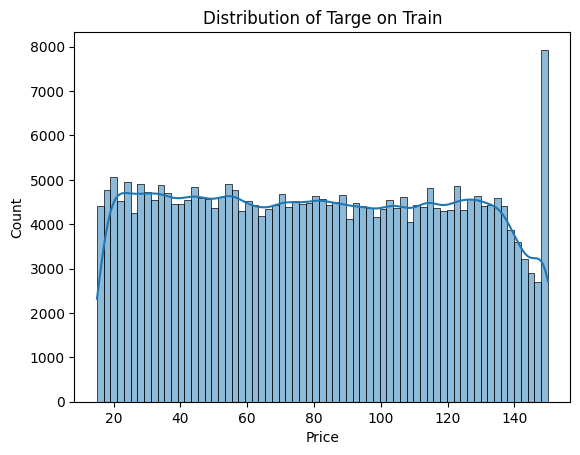

In [24]:
sns.histplot(x= target, data=train, kde=True)
plt.title('Distribution of Targe on Train')
print(f'Skewness: {train[target].skew()}')
plt.show()

Skewness: 0.0369621956010868


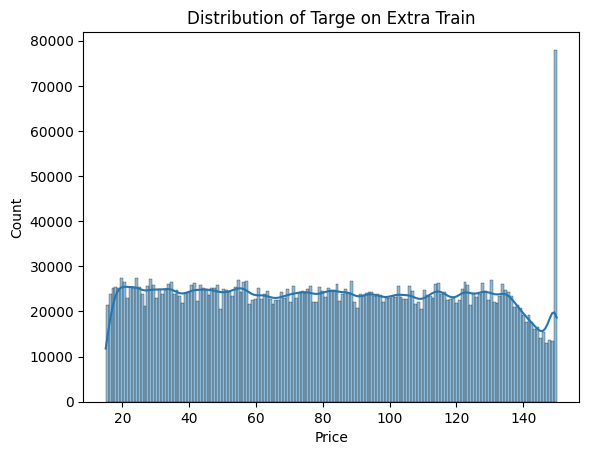

In [25]:
sns.histplot(x= target, data=train_extra, kde=True)
plt.title('Distribution of Targe on Extra Train')
print(f'Skewness: {train_extra[target].skew()}')
plt.show()

In [26]:
train_full=pd.concat([train, train_extra], axis=0, ignore_index=True)

Skewness: 0.0369621956010868


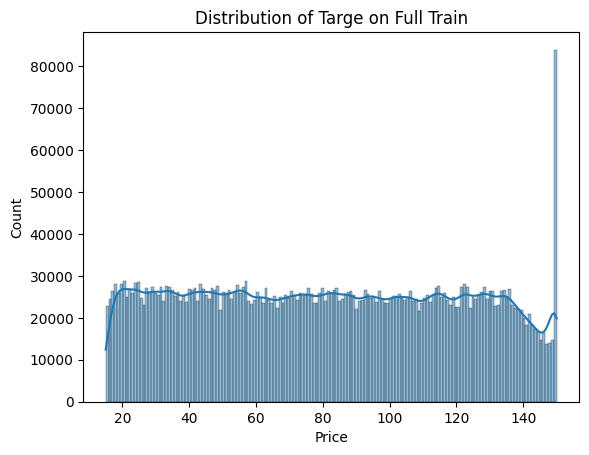

In [27]:
sns.histplot(x= target, data=train_full, kde=True)
plt.title('Distribution of Targe on Full Train')
print(f'Skewness: {train_extra[target].skew()}')
plt.show()

In [28]:
categorical_cols = train_full.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['Brand',
 'Material',
 'Size',
 'Laptop Compartment',
 'Waterproof',
 'Style',
 'Color']

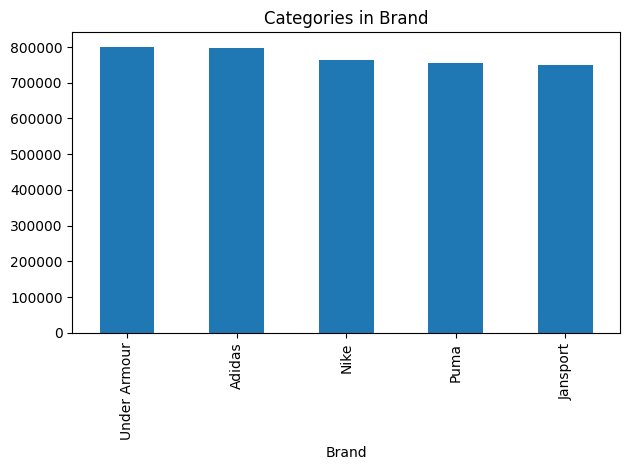

Brand has 5 unique values


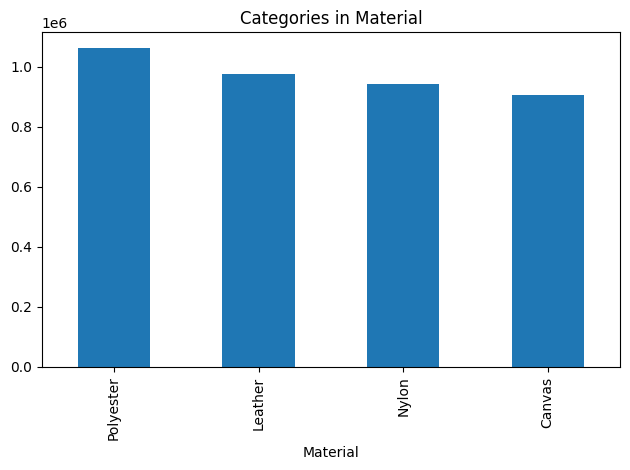

Material has 4 unique values


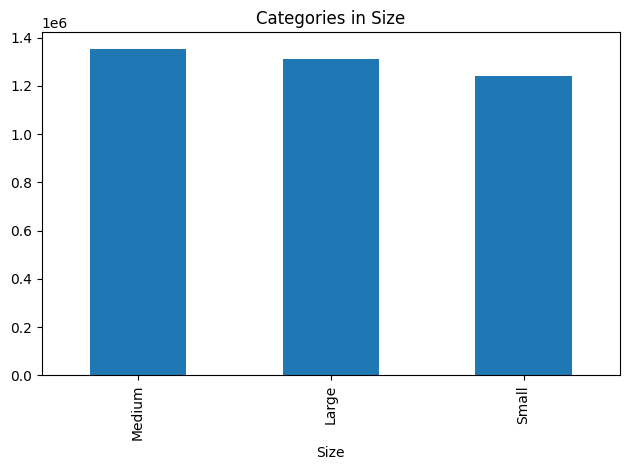

Size has 3 unique values


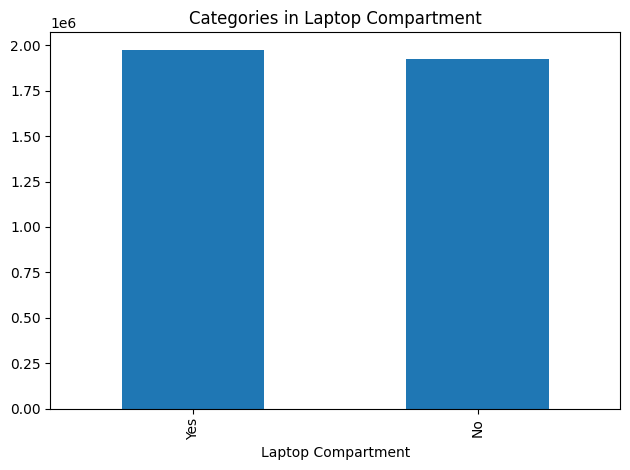

Laptop Compartment has 2 unique values


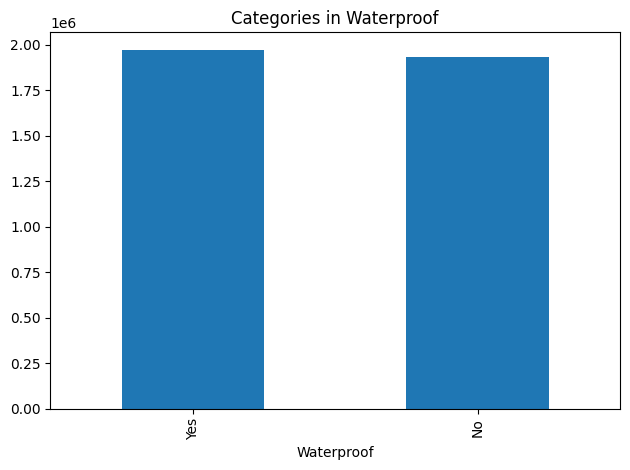

Waterproof has 2 unique values


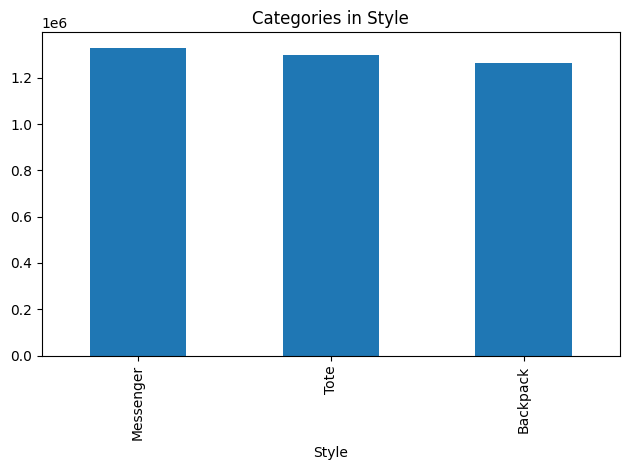

Style has 3 unique values


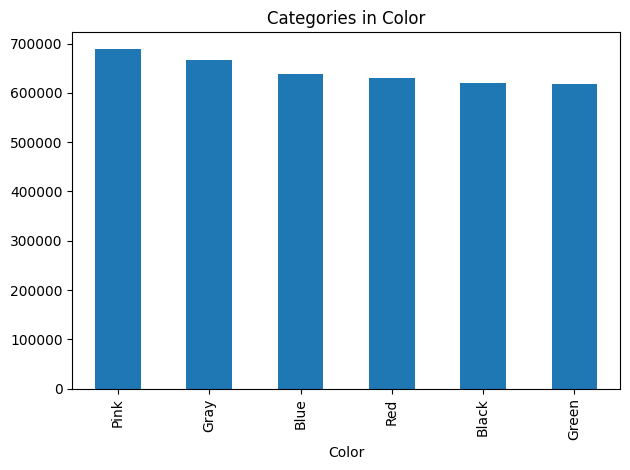

Color has 6 unique values


In [29]:
for col in categorical_cols:
    value_counts = train_full[col].value_counts()
    plt.title(f'Categories in {col}')
    value_counts.plot(kind='bar')
    plt.tight_layout()
    plt.show()
    
    print(f"{col} has {len(value_counts)} unique values")

In [30]:
# Identify numerical columns
numerical_cols = train_full.select_dtypes(include=['float64']).columns.tolist()
numerical_cols

['Compartments', 'Weight Capacity (kg)', 'Price']

In [31]:
numerical_cols.remove(target)
numerical_cols

['Compartments', 'Weight Capacity (kg)']

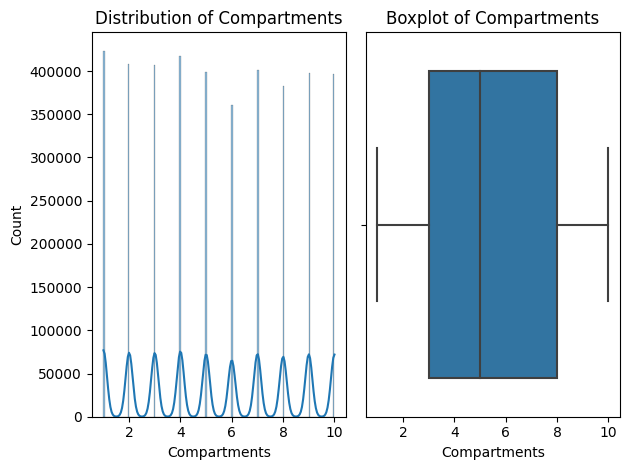

Compartments statistics:
  - Min: 1.0
  - Max: 10.0
  - Mean: 5.43
  - Median: 5.00
  - Std: 2.89
  - Skewness: 0.03
  - Kurtosis: -1.24



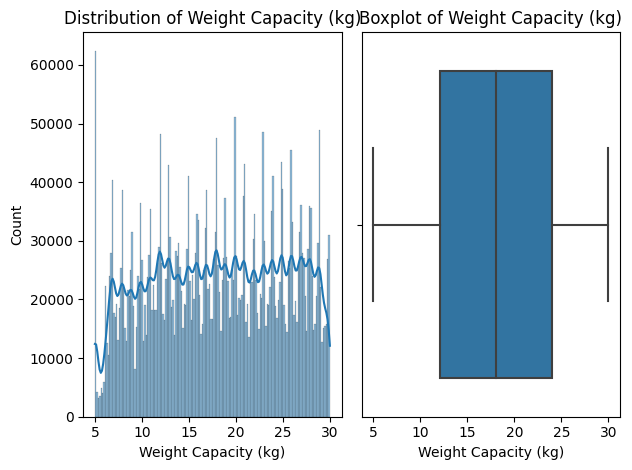

Weight Capacity (kg) statistics:
  - Min: 5.0
  - Max: 30.0
  - Mean: 18.01
  - Median: 18.05
  - Std: 6.97
  - Skewness: -0.06
  - Kurtosis: -1.15



In [32]:
for col in numerical_cols:
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(train_full[col], kde=True)
    plt.title(f'Distribution of {col}')
    
    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=train_full[col])
    plt.title(f'Boxplot of {col}')
    
    plt.tight_layout()
    plt.show()
    
    # Print statistics
    print(f"{col} statistics:")
    print(f"  - Min: {train_full[col].min()}")
    print(f"  - Max: {train_full[col].max()}")
    print(f"  - Mean: {train_full[col].mean():.2f}")
    print(f"  - Median: {train_full[col].median():.2f}")
    print(f"  - Std: {train_full[col].std():.2f}")
    print(f"  - Skewness: {train_full[col].skew():.2f}")
    print(f"  - Kurtosis: {train_full[col].kurt():.2f}\n")

In [33]:
for col in train_full.columns:
    if train_full[col].dtype == 'object':
        train_full[col].fillna(train_full[col].mode()[0], inplace=True)
    else:
        train_full[col].fillna(train_full[col].mean(), inplace=True)

In [34]:
train_encoded = pd.get_dummies(train_full, drop_first=True)
train_encoded.head()

,id,Compartments,Weight Capacity (kg),Price,Brand_Jansport,Brand_Nike,Brand_Puma,Brand_Under Armour,Material_Leather,Material_Nylon,...,Size_Small,Laptop Compartment_Yes,Waterproof_Yes,Style_Messenger,Style_Tote,Color_Blue,Color_Gray,Color_Green,Color_Pink,Color_Red
0,0,7.0,11.611723,112.15875,True,False,False,False,True,False,...,False,True,False,False,True,False,False,False,False,False
1,1,10.0,27.078537,68.88056,True,False,False,False,False,False,...,True,True,True,True,False,False,False,True,False,False
2,2,2.0,16.643760,39.17320,False,False,False,True,True,False,...,True,True,False,True,False,False,False,False,False,True
3,3,8.0,12.937220,80.60793,False,True,False,False,False,True,...,True,True,False,True,False,False,False,True,False,False
4,4,1.0,17.749338,86.02312,False,False,False,False,False,False,...,False,True,True,True,False,False,False,True,False,False


In [35]:
for col in test.columns:
    if test[col].dtype == 'object':
        test[col].fillna(test[col].mode()[0], inplace=True)
    else:
        test[col].fillna(test[col].mean(), inplace=True)

In [36]:
test_encoded = pd.get_dummies(test, drop_first=True)
test_encoded.head()

,id,Compartments,Weight Capacity (kg),Brand_Jansport,Brand_Nike,Brand_Puma,Brand_Under Armour,Material_Leather,Material_Nylon,Material_Polyester,...,Size_Small,Laptop Compartment_Yes,Waterproof_Yes,Style_Messenger,Style_Tote,Color_Blue,Color_Gray,Color_Green,Color_Pink,Color_Red
0,300000,2.0,20.671147,False,False,True,False,True,False,False,...,True,False,False,False,True,False,False,True,False,False
1,300001,7.0,13.564105,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
2,300002,9.0,11.809799,False,False,False,False,False,False,False,...,False,False,True,True,False,True,False,False,False,False
3,300003,1.0,18.477036,False,False,False,False,False,True,False,...,False,True,False,True,False,False,False,True,False,False
4,300004,2.0,9.907953,False,False,False,False,False,True,False,...,False,True,True,False,True,False,False,False,False,False


# Mean for baseline

In [37]:
mean_price = train_full['Price'].mean()
mean_price

81.362174592754

In [38]:
submission['Price'] = mean_price
submission

,id,Price
0,300000,81.362175
1,300001,81.362175
2,300002,81.362175
3,300003,81.362175
4,300004,81.362175
...,...,...
199995,499995,81.362175
199996,499996,81.362175
199997,499997,81.362175
199998,499998,81.362175


In [39]:
submission.to_csv('submission.csv', index=False)

# XGBoost

In [40]:
X = train_encoded.drop(target, axis=1)
y = train_encoded[target]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Grid Search

In [42]:
param_grid = {
    'n_estimators': [50, 100, 200],  # Número de árvores
    'learning_rate': [0.01, 0.1, 0.2],  # Taxa de aprendizado
    'max_depth': [3, 6, 10],  # Profundidade máxima das árvores
}

In [43]:
model = xgb.XGBRegressor(objective='reg:squarederror', tree_method='gpu_hist', random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           scoring='neg_mean_squared_error',  # Usando o erro quadrático negativo
                           cv=5,  # Número de folds para cross-validation
                           verbose=2,  # Exibir informações de progresso
                           )  # Usar todos os núcleos do processador
grid_search.fit(X_train, y_train)
print("Melhores parâmetros encontrados: ", grid_search.best_params_)

# Melhor modelo
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   7.9s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   7.6s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   7.6s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   7.4s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   7.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   8.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   8.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   8.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   8.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   8.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   9.7s
[CV] END ..learning_rate=0.01, max_depth=3, n_e

In [44]:
y_pred = best_model.predict(X_test)

# Calculando o RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

RMSE: 38.87833885987618


In [45]:
param_grid = {
    'n_estimators': [250, 300, 500],  # Número de árvores
    'learning_rate': [0.2, 0.5, 0.7],  # Taxa de aprendizado
    'max_depth': [3, 2],  # Profundidade máxima das árvores
}

In [46]:
model = xgb.XGBRegressor(objective='reg:squarederror', tree_method='gpu_hist', random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           scoring='neg_mean_squared_error',  # Usando o erro quadrático negativo
                           cv=5,  # Número de folds para cross-validation
                           verbose=2,  # Exibir informações de progresso
                           )  # Usar todos os núcleos do processador
grid_search.fit(X_train, y_train)
print("Melhores parâmetros encontrados: ", grid_search.best_params_)

# Melhor modelo
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=250; total time=  10.0s
[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=250; total time=   9.7s
[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=250; total time=   9.6s
[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=250; total time=   9.6s
[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=250; total time=   9.8s
[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=300; total time=  10.4s
[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=300; total time=  10.6s
[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=300; total time=  10.2s
[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=300; total time=  10.4s
[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=300; total time=  10.4s
[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=500; total time=  13.0s
[CV] END ...learning_rate=0.2, max_depth=3, n_es

In [47]:
y_pred = best_model.predict(X_test)

# Calculando o RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

RMSE: 38.87760380607096


## Best result submission

### 1st

In [48]:
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=200, learning_rate=0.2, max_depth=3)
model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [49]:
y_pred = model.predict(test_encoded)
y_pred

array([81.210014, 82.04096 , 82.44533 , ..., 82.67626 , 81.555786,
       81.35394 ], dtype=float32)

### 2nd

In [50]:
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=500, learning_rate=0.5, max_depth=2)
model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [51]:
y_pred = model.predict(test_encoded)
y_pred

array([80.721306, 81.69826 , 82.87817 , ..., 82.197105, 81.29297 ,
       81.74663 ], dtype=float32)

## Train

In [52]:
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=200, learning_rate=0.2)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [53]:
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

RMSE: 38.895426479663264


## Using all dataframe to train

In [54]:
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [55]:
y_pred = model.predict(test_encoded)
y_pred

array([81.30546 , 81.97165 , 82.725334, ..., 83.55958 , 81.82034 ,
       80.88775 ], dtype=float32)

## Submission

In [56]:
submission['Price'] = y_pred
submission

,id,Price
0,300000,81.305458
1,300001,81.971649
2,300002,82.725334
3,300003,81.578751
4,300004,77.804817
...,...,...
199995,499995,79.735237
199996,499996,77.295891
199997,499997,83.559578
199998,499998,81.820343


In [57]:
# Remove old file(s)
import os
os.remove('/kaggle/working/submission.csv')

In [58]:
submission.to_csv('submission.csv', index=False)